# TWEET VISUALIZATION AND SENTIMENT ANALYSIS

BY: V ANDAL PRIYADHARSHINI (RA1811004010087)
    VEMU LAKSHMI ANANYA    (RA1811004010089)

Import the basic libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

Import the modules necessary for this topic

In [2]:
from tweepy import *
import nltk
from nltk.corpus import stopwords 
from textblob import *
from wordcloud import *
import credentials

Getting credentials to access twitter API. The credentials are not supposed to be shown according to twitter developer account policy. So, we have created a separate module from where we access the credentials

In [3]:
accessToken = credentials.accessToken
accessTokenSecret = credentials.accessTokenSecret
consumerKey = credentials.consumerKey
consumerSecret = credentials.consumerSecret

authenticateing the keys to access realtime data from twitter

In [4]:
authenticate = OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api=API(authenticate, wait_on_rate_limit=True)

Visualizing 100 tweets from the twitter account of timeofindia. Other profiles can also be accessed by changing the screen_name.

In [5]:
posts = api.user_timeline(screen_name="timesofindia", count=100, lang="en", tweet_mode="extended")
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
    print(str(i)+')'+tweet.full_text+'\n')
    i=i+1

Show the 5 recent tweets: 

1)Corona curfew imposed from midnight of May 6 to May 16. All offices to remain closed and only essential services allowed. No one from outside allowed without negative RT-PCR report. Class 10th exams cancelled, students to be promoted: Govt of Himachal Pradesh

2)RT-PCR negative report must for flyers entering Bengal from May 7

From May 7, no air passenger will be allowed in Bengal without RT-PCR negative report not older than 72 hours: CM Mamata Banerjee

#COVID19 Live updates 👇 
https://t.co/xRbti0lTzS https://t.co/FBijf29wrC

3)Chromebooks leads the worldwide PC market with 53.1% year-on-year growth

https://t.co/6J5NMfRTNS via @gadgetsnow

4)#Update | Sensex rallies 424.04 pts to end at 48,677.55; Nifty surges 121.35 pts to 14,617.85

5)West Bengal: TMC’s biggest win at old Congress bastion https://t.co/7PxBoRJYd8 https://t.co/1C6VpPhOVc



Create a dataframe with a column called tweets and id

In [6]:
df=pd.DataFrame([i+1 for i in range(100)],columns=['id'])
df['tweet']=[tweet.full_text.lower() for tweet in posts]
#show the first 5 rows of data
df.head()

,id,tweet
0,1,corona curfew imposed from midnight of may 6 t...
1,2,rt-pcr negative report must for flyers enterin...
2,3,chromebooks leads the worldwide pc market with...
3,4,#update | sensex rallies 424.04 pts to end at ...
4,5,west bengal: tmc’s biggest win at old congress...


Remove_pattern function is used to remove the usernames, links and other special characters except hash tags

In [7]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

Data clean the tweet column and create hash_tweet column with hashtags and tweets

In [8]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
# remove links (https)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "https[\w]*")
# remove all characters except # and alphabets
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove short words that do not affect the polarity
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(nltk.word_tokenize)
stop = stopwords.words('english')
tokenized_tweet=tokenized_tweet.apply(lambda x: [item for item in x if item not in stop])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,id,tweet,clean_tweet
0,1,corona curfew imposed from midnight of may 6 t...,corona curfew imposed midnight offices remain ...
1,2,rt-pcr negative report must for flyers enterin...,negative report must flyers entering bengal pa...
2,3,chromebooks leads the worldwide pc market with...,chromebooks leads worldwide market year year g...
3,4,#update | sensex rallies 424.04 pts to end at ...,# update sensex rallies nifty surges
4,5,west bengal: tmc’s biggest win at old congress...,west bengal biggest congress bastion pxborjyd ...


Function to plot a wordcloud graph

In [9]:
# plot the graph
def graph(word):
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(word)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

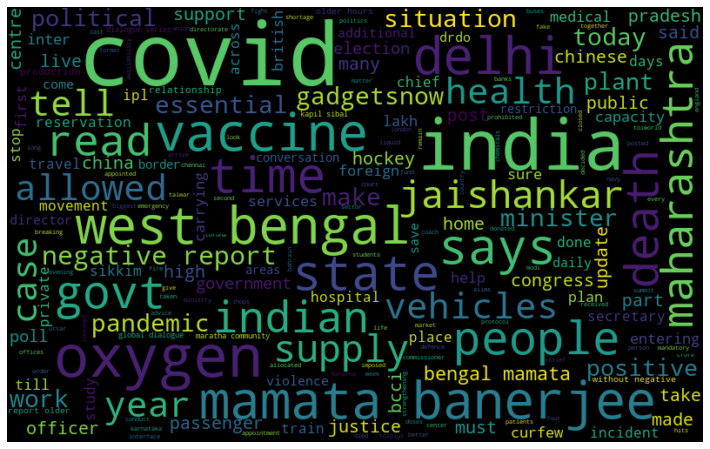

In [10]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
graph(all_words)

FIND IF A TWEET IS NEGATIVE POSITIVE

In [11]:
#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#Create two columns subjectivity and polarity
df['Polarity']=df['clean_tweet'].apply(getPolarity)
#show the new dataframe
df.head()

,id,tweet,clean_tweet,Polarity
0,1,corona curfew imposed from midnight of may 6 t...,corona curfew imposed midnight offices remain ...,-0.100000
1,2,rt-pcr negative report must for flyers enterin...,negative report must flyers entering bengal pa...,-0.074242
2,3,chromebooks leads the worldwide pc market with...,chromebooks leads worldwide market year year g...,0.000000
3,4,#update | sensex rallies 424.04 pts to end at ...,# update sensex rallies nifty surges,0.000000
4,5,west bengal: tmc’s biggest win at old congress...,west bengal biggest congress bastion pxborjyd ...,0.000000


Use polarity column to analyse nature of tweets

In [12]:
#create a function to compute negative, neutral and positve analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'    
df['Analysis']=df['Polarity'].apply(getAnalysis)
#show the dataframe
df.head()

,id,tweet,clean_tweet,Polarity,Analysis
0,1,corona curfew imposed from midnight of may 6 t...,corona curfew imposed midnight offices remain ...,-0.100000,Negative
1,2,rt-pcr negative report must for flyers enterin...,negative report must flyers entering bengal pa...,-0.074242,Negative
2,3,chromebooks leads the worldwide pc market with...,chromebooks leads worldwide market year year g...,0.000000,Neutral
3,4,#update | sensex rallies 424.04 pts to end at ...,# update sensex rallies nifty surges,0.000000,Neutral
4,5,west bengal: tmc’s biggest win at old congress...,west bengal biggest congress bastion pxborjyd ...,0.000000,Neutral


Frequent words visualization for positive

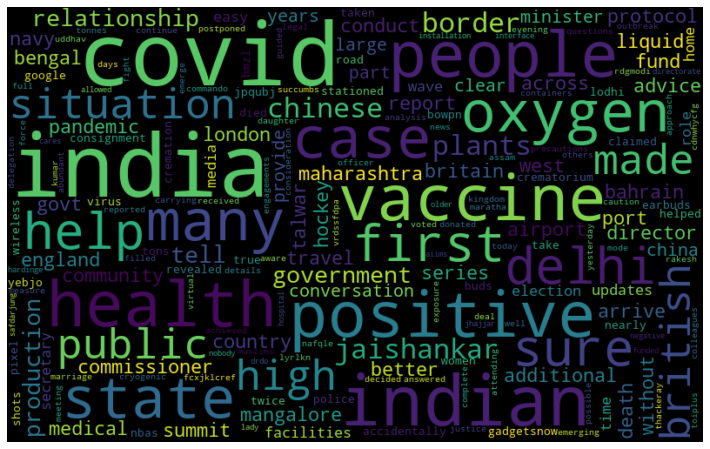

In [13]:
pos_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Positive']])
# plot the graph
graph(pos_words)

Frequent words visualization for negative tweets

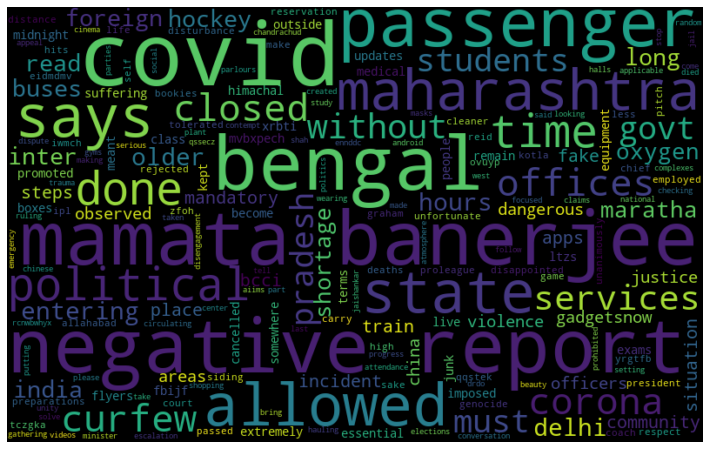

In [14]:
# frequent words visualization for -ve
neg_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Negative']])
# plot the graph
graph(neg_words)

Frequent words visualization for neutral tweets

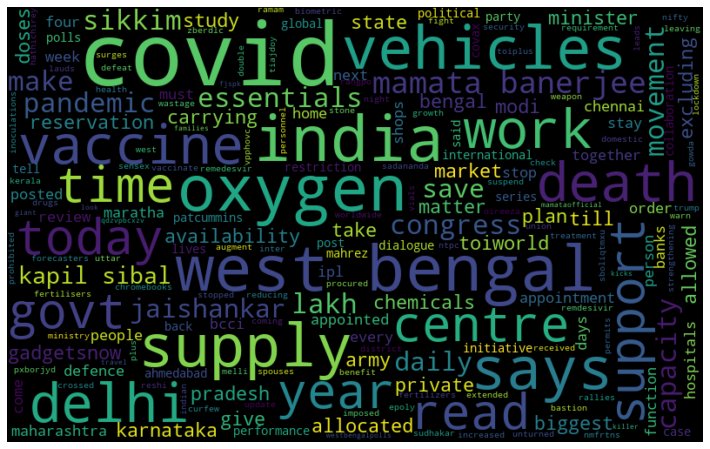

In [15]:
# frequent words visualization for neutral
neu_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Neutral']])
# plot the graph
graph(neu_words)

Find the percentage of each type of tweet

In [16]:
def percentage(vibe):
    pertweets= df[df.Analysis ==vibe]
    pertweets = pertweets['tweet']
    vibeval=round(pertweets.shape[0]/df.shape[0]*100,1)
    print(vibe,"Tweets:",end=" ")
    return vibeval

Print the percentage values

In [17]:
positive=percentage('Positive')
print(positive)
negative=percentage('Negative')
print(negative)
neutral=percentage('Neutral')
print(neutral)

Positive Tweets: 32.0
Negative Tweets: 18.0
Neutral Tweets: 50.0


Plot the positive, neutral and negative tweets in a bar graph

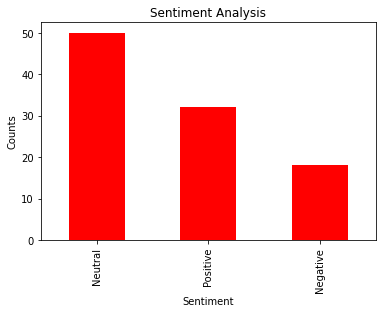

In [18]:
#show the value counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()

Exploratory Data Analysis using the hashtags

In [19]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

Extracting hashtags from the hash_tweet considering analysis column

In [20]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(df['tweet'][df['Analysis']=='Positive'])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['tweet'][df['Analysis']=='Negative'])

# extract hashtags from negative tweets
ht_neutral = hashtag_extract(df['tweet'][df['Analysis']=='Neutral'])

checking any one of them to see the list

In [21]:
# unnest list
#Remove the empty list items within the list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])
ht_positive[:5]

['muslims', 'assam', 'britain', 'safe', 'travel']

Function to plot the bargraph for top 10 hashtags along with the dataframe

In [22]:
def pdframe(vibe):
    freq = nltk.FreqDist(vibe)
    d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})  
    # select top 10 hashtags
    d = d.nlargest(columns='Count', n=10)
    plt.figure(figsize=(20,9))
    sns.barplot(data=d, x='Hashtag', y='Count')
    plt.show()  
    return d

Plot for top 10 hash tags in positive tweets

Positive tweets based on hashtags


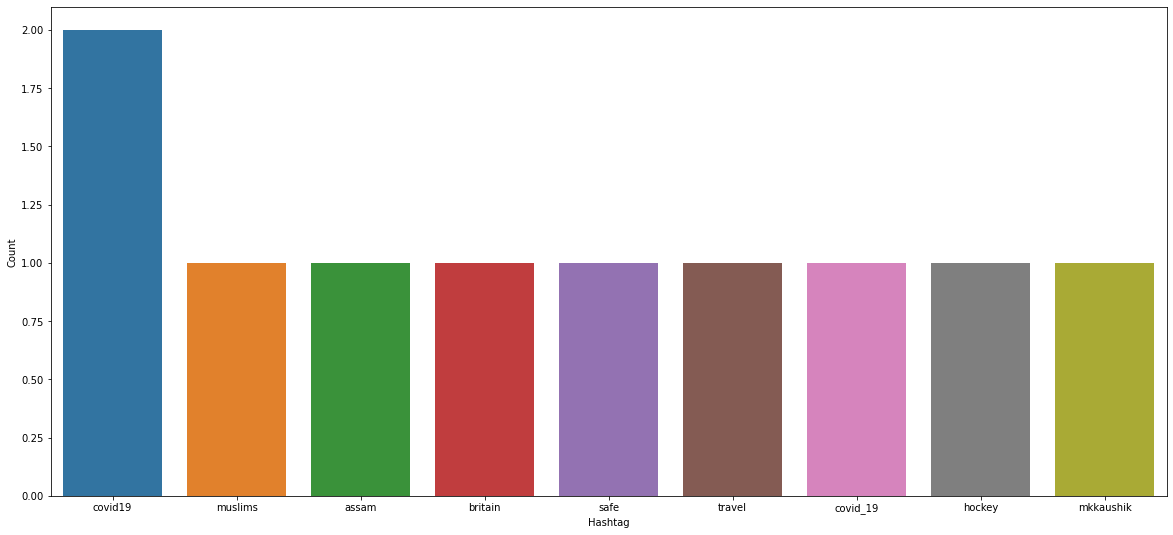

,Hashtag,Count
8,covid19,2
0,muslims,1
1,assam,1
2,britain,1
3,safe,1
4,travel,1
5,covid_19,1
6,hockey,1
7,mkkaushik,1


In [23]:
print('Positive tweets based on hashtags')
freq_pos = pdframe(ht_positive)
freq_pos

Plot for top 10 hash tags in negative tweets

Negative tweets based on hashtags


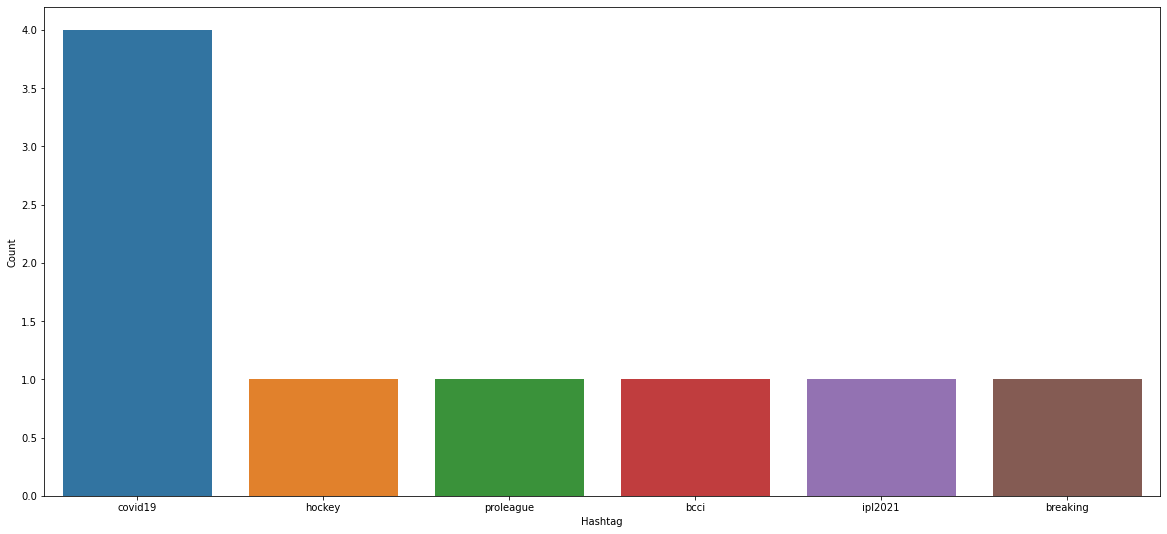

,Hashtag,Count
0,covid19,4
1,hockey,1
2,proleague,1
3,bcci,1
4,ipl2021,1
5,breaking,1


In [24]:
print('Negative tweets based on hashtags')
freq_neg = pdframe(ht_negative)
freq_neg

Plot for top 10 hash tags in neutral tweets

Neutral tweets based on hashtags


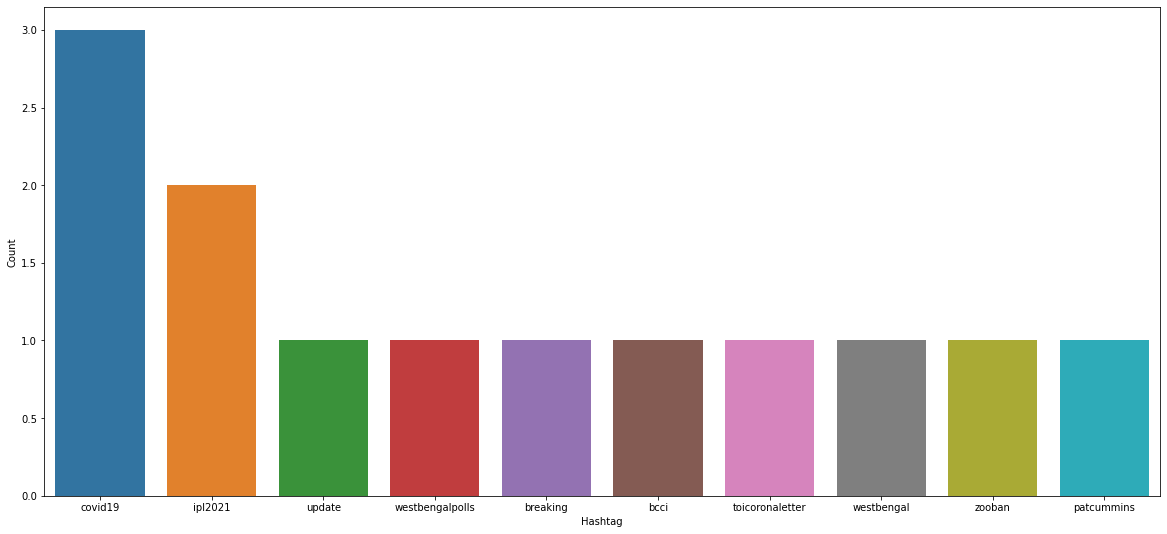

,Hashtag,Count
1,covid19,3
4,ipl2021,2
0,update,1
2,westbengalpolls,1
3,breaking,1
5,bcci,1
6,toicoronaletter,1
7,westbengal,1
8,zooban,1
9,patcummins,1


In [25]:
print('Neutral tweets based on hashtags')
freq_neu = pdframe(ht_neutral)
freq_neu